In [1]:
import pandas as pd                                                 

In [2]:
## Load datasets
data=pd.read_csv('C:\\Users\\shwet\\OneDrive\\Documents\\OnlineCourses\\insaid\\ghouls-goblins-and-ghosts-boo\\train.csv\\train.csv')
data_test=pd.read_csv('C:\\Users\\shwet\\OneDrive\\Documents\\OnlineCourses\\insaid\\ghouls-goblins-and-ghosts-boo\\test.csv\\test.csv')


In [3]:
## Inspect dataset
data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [21]:
############################
#Finding missing values
#no missing values found
###########################3
print(data.isnull().sum())
print(data_test.isnull().sum())

id                 0
bone_length        0
rotting_flesh      0
hair_length        0
has_soul           0
color              0
type               0
Indicator_blue     0
Indicator_clear    0
Indicator_black    0
Indicator_blood    0
Indicator_green    0
Indicator_white    0
dtype: int64
id                 0
bone_length        0
rotting_flesh      0
hair_length        0
has_soul           0
color              0
Indicator_blue     0
Indicator_clear    0
Indicator_black    0
Indicator_blood    0
Indicator_green    0
Indicator_white    0
dtype: int64


In [4]:
from sklearn.linear_model import LogisticRegression


In [22]:
### The color variable is string so it has to be made into factor or indicator variable
### This is one hot encodeing
s1=set(data["color"])
#print(s1)

data["Indicator_blue"] = 1*(data["color"]=='blue')
data["Indicator_clear"] = 1*(data["color"]=='clear')
data["Indicator_black"] = 1*(data["color"]=='black')
data["Indicator_blood"] = 1*(data["color"]=='blood')
data["Indicator_green"] = 1*(data["color"]=='green')
data["Indicator_white"] = 1*(data["color"]=='white')

X=data[["bone_length","rotting_flesh","hair_length","has_soul","Indicator_blue","Indicator_clear","Indicator_black","Indicator_blood","Indicator_green","Indicator_white"]]

Y=data[["type"]]
X.head()


,bone_length,rotting_flesh,hair_length,has_soul,Indicator_blue,Indicator_clear,Indicator_black,Indicator_blood,Indicator_green,Indicator_white
0,0.354512,0.350839,0.465761,0.781142,0,1,0,0,0,0
1,0.575560,0.425868,0.531401,0.439899,0,0,0,0,1,0
2,0.467875,0.354330,0.811616,0.791225,0,0,1,0,0,0
3,0.776652,0.508723,0.636766,0.884464,0,0,1,0,0,0
4,0.566117,0.875862,0.418594,0.636438,0,0,0,0,1,0


In [6]:
### Import functions for train and test set creation

import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
## Create train and test set
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.33, random_state=42)

In [8]:
## Fit logistic regression - multinomial logit

clf = LogisticRegression(random_state=0).fit(X_train1, Y_train1)
preds1=clf.predict(X_test1)

C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [9]:
## Find percent correctly indentified/classified

from sklearn.metrics import accuracy_score
accuracy_score(Y_test1, preds1)

0.6991869918699187

In [10]:
### L1 penalty regularized logistic regression
### Find accuracy
## This gives more accuracy

clf1 = LogisticRegression(random_state=0,penalty='l1').fit(X_train1, Y_train1)
preds2=clf1.predict(X_test1)
accuracy_score(Y_test1, preds2)

C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7317073170731707

In [11]:
import numpy
## Random forest model
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

Y2_train=numpy.ravel(Y_train1)
clf.fit(X_train1,Y2_train)

preds3=clf.predict(X_test1)
accuracy_score(Y_test1, preds3)

0.7073170731707317

In [12]:
#### Regularized logistic regression l1 penalty gives highest accuracy so using it for classification

clf = LogisticRegression(random_state=0,penalty='l1').fit(X, Y)

C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [13]:
clf.predict(X)

array(['Goblin', 'Goblin', 'Ghoul', 'Ghoul', 'Ghost', 'Goblin', 'Ghoul',
       'Ghoul', 'Ghost', 'Ghost', 'Ghost', 'Ghoul', 'Ghoul', 'Goblin',
       'Ghoul', 'Ghoul', 'Goblin', 'Ghoul', 'Ghoul', 'Ghost', 'Goblin',
       'Goblin', 'Goblin', 'Goblin', 'Ghoul', 'Ghost', 'Goblin', 'Ghoul',
       'Goblin', 'Goblin', 'Ghost', 'Ghost', 'Ghoul', 'Goblin', 'Ghoul',
       'Ghost', 'Ghost', 'Ghoul', 'Ghoul', 'Ghost', 'Ghoul', 'Ghost',
       'Ghost', 'Ghost', 'Goblin', 'Ghost', 'Ghoul', 'Ghost', 'Ghost',
       'Goblin', 'Ghoul', 'Ghoul', 'Ghost', 'Ghost', 'Ghost', 'Ghoul',
       'Ghost', 'Ghoul', 'Ghost', 'Ghoul', 'Goblin', 'Ghost', 'Ghoul',
       'Ghost', 'Ghoul', 'Ghost', 'Ghost', 'Ghoul', 'Ghost', 'Goblin',
       'Ghoul', 'Ghost', 'Ghost', 'Ghoul', 'Ghoul', 'Goblin', 'Goblin',
       'Ghost', 'Ghoul', 'Ghoul', 'Ghost', 'Ghost', 'Ghost', 'Ghoul',
       'Ghost', 'Goblin', 'Ghoul', 'Ghost', 'Ghoul', 'Ghoul', 'Ghost',
       'Ghoul', 'Goblin', 'Ghoul', 'Goblin', 'Goblin', 'Ghost', 'Gobli

In [14]:
data_test["Indicator_blue"] = 1*(data_test["color"]=='blue')
data_test["Indicator_clear"] = 1*(data_test["color"]=='clear')
data_test["Indicator_black"] = 1*(data_test["color"]=='black')
data_test["Indicator_blood"] = 1*(data_test["color"]=='blood')
data_test["Indicator_green"] = 1*(data_test["color"]=='green')
data_test["Indicator_white"] = 1*(data_test["color"]=='white')


In [15]:
X_test=data_test[["bone_length","rotting_flesh","hair_length","has_soul","Indicator_blue","Indicator_clear","Indicator_black","Indicator_blood","Indicator_green","Indicator_white"]]

clf.predict(X_test)

array(['Ghoul', 'Ghoul', 'Ghoul', 'Ghost', 'Ghost', 'Ghost', 'Ghoul',
       'Ghoul', 'Goblin', 'Ghoul', 'Ghost', 'Ghoul', 'Goblin', 'Ghost',
       'Ghoul', 'Ghost', 'Ghoul', 'Ghost', 'Ghost', 'Ghoul', 'Ghoul',
       'Ghoul', 'Ghoul', 'Ghost', 'Ghoul', 'Goblin', 'Ghoul', 'Goblin',
       'Ghoul', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghoul', 'Goblin', 'Goblin',
       'Ghoul', 'Ghost', 'Ghoul', 'Ghost', 'Ghoul', 'Goblin', 'Ghoul',
       'Ghoul', 'Ghoul', 'Goblin', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghoul',
       'Goblin', 'Goblin', 'Ghoul', 'Ghost', 'Goblin', 'Goblin', 'Ghost',
       'Goblin', 'Ghoul', 'Ghoul', 'Ghost', 'Ghoul', 'Ghoul', 'Ghost',
       'Goblin', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghost', 'Ghoul',
       'Ghost', 'Ghost', 'Ghoul', 'Ghoul', 'Goblin', 'Ghoul', 'Ghoul',
       'Goblin', 'Ghost', 'Goblin', 'Ghost', 'Goblin', 'Ghoul', 'Ghoul',
       'Ghost', 'Ghost', 'Ghost', 'Goblin', 'Ghost', 'Ghost', 'Ghost',
       'Ghost', 'Ghoul', 'Goblin', 'Ghost', 'Ghost', 'Ghost', 'Goblin',

In [16]:
## Finding correlations in independent variables
X.corr()

### When bone length is more, hair length is also more
### hair length and rotting flesh are negavitly correlated

,bone_length,rotting_flesh,hair_length,has_soul,Indicator_blue,Indicator_clear,Indicator_black,Indicator_blood,Indicator_green,Indicator_white
bone_length,1.000000,-0.041716,0.353881,0.381675,0.083212,-0.041600,0.036206,-0.042314,0.036764,-0.029831
rotting_flesh,-0.041716,1.000000,-0.220353,-0.132051,0.067218,-0.130895,0.076409,0.030361,0.012733,0.027047
hair_length,0.353881,-0.220353,1.000000,0.474835,-0.092289,0.111772,-0.023958,-0.031920,0.006113,-0.042936
has_soul,0.381675,-0.132051,0.474835,1.000000,0.071343,0.058060,-0.026948,0.006069,-0.070514,-0.027287
Indicator_blue,0.083212,0.067218,-0.092289,0.071343,1.000000,-0.160642,-0.081892,-0.042477,-0.083010,-0.177770
Indicator_clear,-0.041600,-0.130895,0.111772,0.058060,-0.160642,1.000000,-0.243719,-0.126415,-0.247047,-0.529061
Indicator_black,0.036206,0.076409,-0.023958,-0.026948,-0.081892,-0.243719,1.000000,-0.064443,-0.125939,-0.269704
Indicator_blood,-0.042314,0.030361,-0.031920,0.006069,-0.042477,-0.126415,-0.064443,1.000000,-0.065324,-0.139893
Indicator_green,0.036764,0.012733,0.006113,-0.070514,-0.083010,-0.247047,-0.125939,-0.065324,1.000000,-0.273388
Indicator_white,-0.029831,0.027047,-0.042936,-0.027287,-0.177770,-0.529061,-0.269704,-0.139893,-0.273388,1.000000


In [17]:
import matplotlib.pyplot as plt
import numpy as np

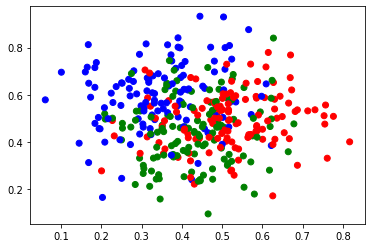

In [18]:

fig, ax = plt.subplots()
colors = {'Ghoul':'red', 'Goblin':'green', 'Ghost':'blue'}


ax.scatter(data['bone_length'], data['rotting_flesh'], c=data['type'].map(colors))

plt.show()

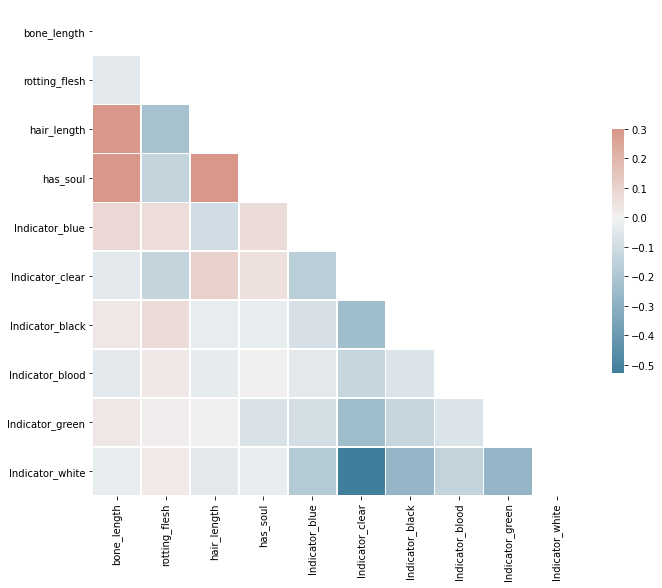

In [19]:

############
#Seaborn
################

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr=X.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
from numpy import savetxt
preds=clf.predict(X_test)
savetxt('C:\\Users\\shwet\\OneDrive\\Documents\\OnlineCourses\\insaid\\ghouls-goblins-and-ghosts-boo\\test.csv\\test.csv',preds,fmt='%s',delimiter='\n')